In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler


In [ ]:
dataset=pd.read_csv('NFLX.csv')

In [ ]:
dataset_train=dataset.iloc[-1000:-100]
dataset_test=dataset.iloc[-100:]
print(dataset_train.columns.tolist())
print(dataset_test.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [ ]:
trainset = dataset_train.iloc[:,1:2].values #Open
display(trainset[0:5])

array([[278.730011],
       [277.73999 ],
       [282.070007],
       [283.880005],
       [281.      ]])

In [ ]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.1202792 ]
 [0.11762178]
 [0.12924443]
 [0.13410283]
 [0.12637231]]
900


In [ ]:
x_train = []
y_train = []


In [ ]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(840, 60) (840,)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)


(samples, time steps, features) = (840, 60, 1)


In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))


In [ ]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

regressor.fit(x_train,y_train,epochs =100, batch_size = 32)

Epoch 1/100
27/27 [==============================] - 14s 135ms/step - loss: 0.0544
Epoch 2/100
27/27 [==============================] - 5s 184ms/step - loss: 0.0116
Epoch 3/100
27/27 [==============================] - 4s 136ms/step - loss: 0.0091
Epoch 4/100
27/27 [==============================] - 4s 137ms/step - loss: 0.0085
Epoch 5/100
27/27 [==============================] - 5s 184ms/step - loss: 0.0083
Epoch 6/100
27/27 [==============================] - 4s 137ms/step - loss: 0.0078
Epoch 7/100
27/27 [==============================] - 4s 134ms/step - loss: 0.0074
Epoch 8/100
27/27 [==============================] - 5s 179ms/step - loss: 0.0076
Epoch 9/100
27/27 [==============================] - 4s 135ms/step - loss: 0.0076
Epoch 10/100
27/27 [==============================] - 4s 136ms/step - loss: 0.0076
Epoch 11/100
27/27 [==============================] - 4s 158ms/step - loss: 0.0067
Epoch 12/100
27/27 [==============================] - 4s 158ms/step - loss: 0.0064
Epoch 13/100

In [ ]:
real_stock_price = dataset_test.iloc[:,1:2].values
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)

In [ ]:
print(len(dataset_total),len(dataset_test))
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
print(inputs.shape)

1000 100
(160,)


In [ ]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)

(160, 1)
(160, 1)


In [ ]:

x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)


(100, 60)
(100, 60, 1)


In [ ]:
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 2s 49ms/step


In [ ]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(100, 1)


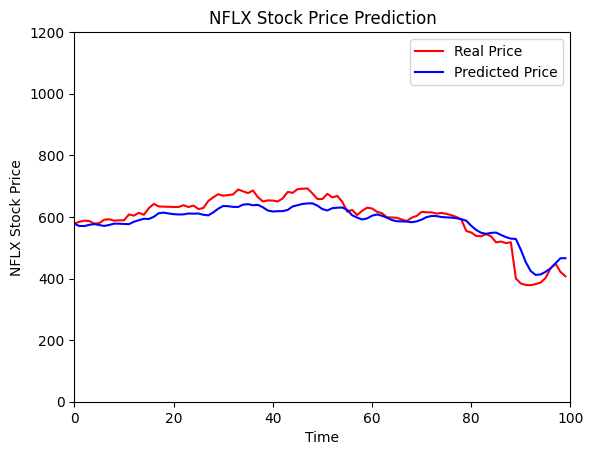

In [ ]:

plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.xlim(0,100)
plt.ylim(0,1200)
plt.legend()
plt.show()

In [ ]:
inputs = np.array(dataset_train['Open'][-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

1/1 [==============================] - 0s 47ms/step


In [ ]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


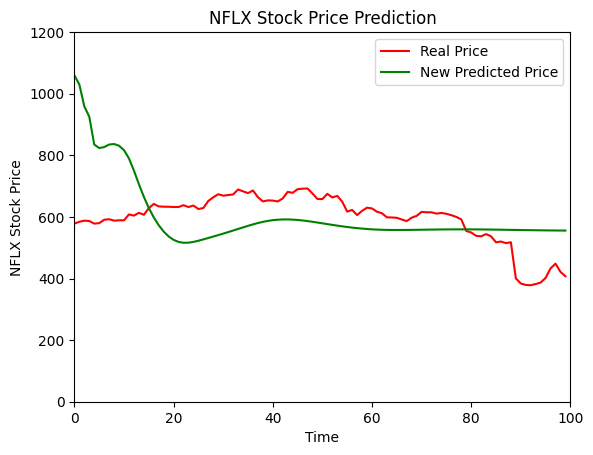

In [ ]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(new_predicted_price, color = 'green', label = 'New Predicted Price')
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.xlim(0,100)
plt.ylim(0,1200)
plt.legend()
plt.show()